In [2]:
import numpy as np
import pandas as pd

In [5]:
fruits = pd.Series(['ЯБЛОКО', 'апельсин', 'Банан', 'ГРейпфрут'])
fruits.apply(lambda x: x.lower())

0       яблоко
1     апельсин
2        банан
3    грейпфрут
dtype: object

In [7]:
numbers = pd.Series(np.random.randn(10))
print(numbers)

print()

print(numbers.apply(abs))

0    1.067286
1    0.170882
2    1.074541
3   -0.780660
4   -0.001052
5    2.058002
6    1.570024
7   -0.391026
8   -0.438893
9    0.228967
dtype: float64

0    1.067286
1    0.170882
2    1.074541
3    0.780660
4    0.001052
5    2.058002
6    1.570024
7    0.391026
8    0.438893
9    0.228967
dtype: float64


In [11]:
fruits = pd.Series(['ЯБЛОКО', 'апельсин', 'Банан', 'ГРейпфрут'])
fruits = fruits.apply(lambda x: x.lower())

print(fruits)

0       яблоко
1     апельсин
2        банан
3    грейпфрут
dtype: object


In [14]:
fruits = pd.Series(['ЯБЛОКО', 'апельсин', 'Банан', 'ГРейпфрут'])
df = pd.DataFrame({'fruits': fruits})

df['fruits_uppercased'] = df.fruits.apply(lambda x: x.upper())
df

,fruits,fruits_uppercased
0,ЯБЛОКО,ЯБЛОКО
1,апельсин,АПЕЛЬСИН
2,Банан,БАНАН
3,ГРейпфрут,ГРЕЙПФРУТ


In [18]:
index = 'AK TX CA MT MN'.split()
area = pd.Series([1717854, 696241, 423970, 381156, 315194], index=index)
population = pd.Series([736732, 26956958, 38802500, 1023579, 2085572], index=index)

states = pd.DataFrame({'area': area, 
                        'population': population})

In [27]:
states.apply(np.sqrt)

,area,population
AK,1310.669295,858.330939
TX,834.410570,5192.009052
CA,651.129787,6229.165273
MT,617.378328,1011.720811
MN,561.421410,1444.150962


In [36]:
states['density'] = states.apply(lambda row: row.population / row.area, axis=1)
states

,area,population,density
AK,1717854,736732,0.428868
TX,696241,26956958,38.717855
CA,423970,38802500,91.521806
MT,381156,1023579,2.685459
MN,315194,2085572,6.616788


# merge / join

In [60]:
index = 'Иванов Петров Сидоров Александров Сергеев'.split()

height = pd.Series(np.random.normal(180, 10, 5).astype(int), index=index)
weight = pd.Series(np.random.normal(80, 7, 5).astype(int), index=index)
age = pd.Series(np.random.normal(23, 3, 5).astype(int), index=index)

health = pd.DataFrame(dict(Рост=height, Вес=weight, Возраст=age))
health['ИМТ'] = health.Вес / (health.Рост / 100) ** 2

health = health.reset_index()
health.rename(columns={'index': 'Пациент'}, inplace=True)

health

,Пациент,Рост,Вес,Возраст,ИМТ
0,Иванов,178,67,20,21.146320
1,Петров,171,80,19,27.358845
2,Сидоров,185,82,24,23.959094
3,Александров,186,77,23,22.256908
4,Сергеев,183,72,19,21.499597


In [68]:
shuffled_index = np.random.choice(index, 5, replace=False)
eduplace = pd.Series(np.random.choice('ТГУ ТПУ Шарага'.split(), 5, replace=True), index=shuffled_index)
close_session = pd.Series(np.random.randint(0, 2, 5).astype(bool), index=shuffled_index)

education = pd.DataFrame({'УЗ': eduplace, 'Закрылся': close_session})

# education = education.reset_index()
# education = education.rename(columns={'index': 'Пациент'})

education

,УЗ,Закрылся
Иванов,ТПУ,False
Александров,ТПУ,True
Сергеев,ТГУ,False
Сидоров,ТГУ,False
Петров,ТПУ,True


In [69]:
# pd.merge(left, right, left_on, right_on, left_index, right_index, how)
pd.merge(health, education, left_on='Пациент', right_index=True)

,Пациент,Рост,Вес,Возраст,ИМТ,УЗ,Закрылся
0,Иванов,178,67,20,21.146320,ТПУ,False
1,Петров,171,80,19,27.358845,ТПУ,True
2,Сидоров,185,82,24,23.959094,ТГУ,False
3,Александров,186,77,23,22.256908,ТПУ,True
4,Сергеев,183,72,19,21.499597,ТГУ,False


# kNN - метод к ближайших соседей - k-nearest neighbours

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

color_map = {species: i for i, species in enumerate(set(iris.species))}
color = iris.species.apply(color_map.get)

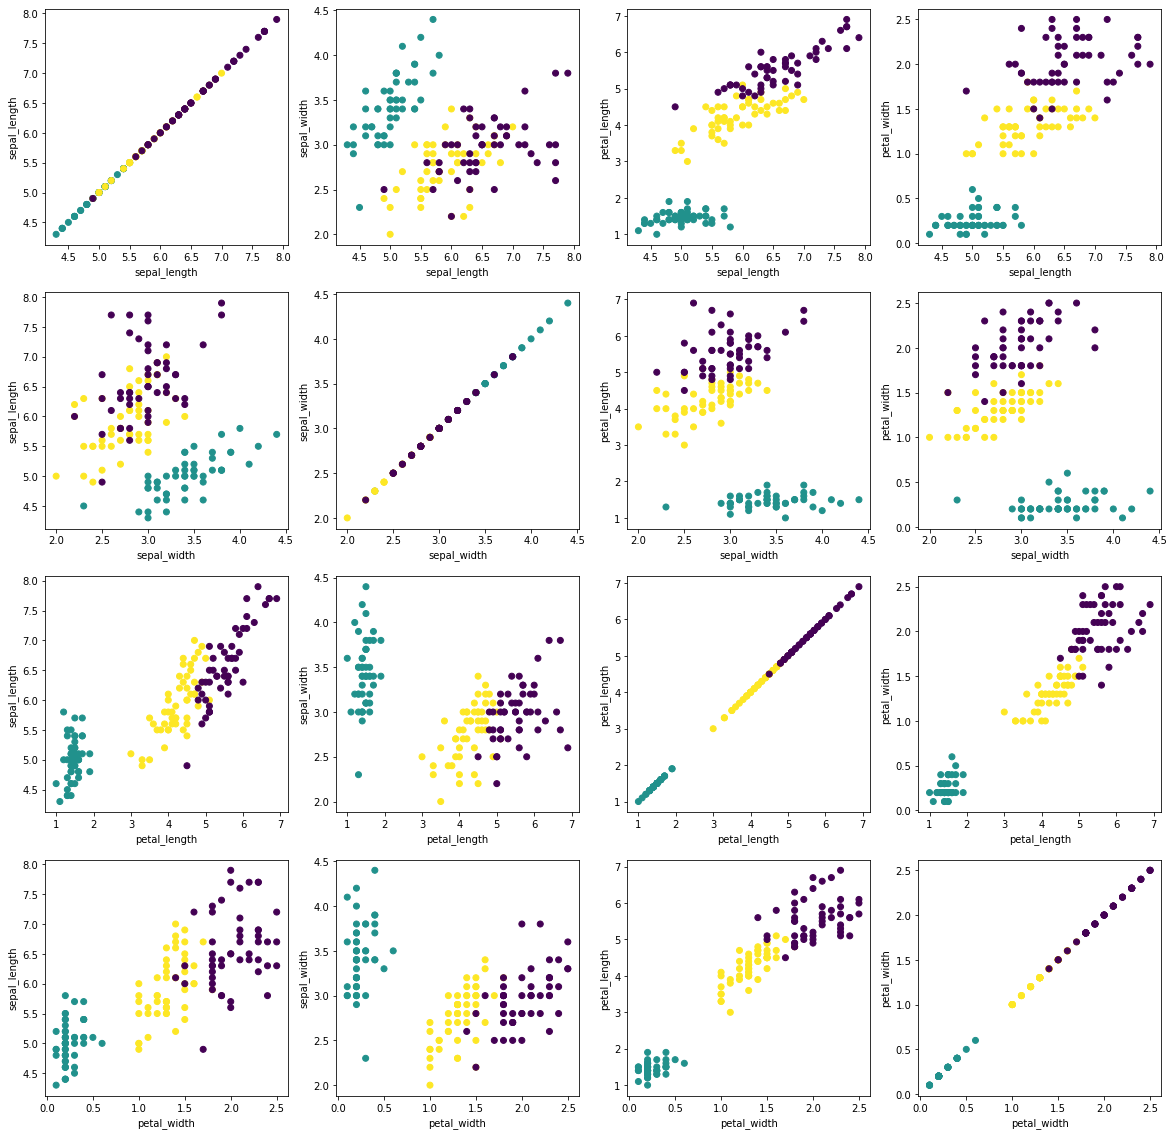

In [91]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
feat_columns = iris.columns[:-1]

for i, feat1 in enumerate(feat_columns):
    for j, feat2 in enumerate(feat_columns):
        x1 = iris[feat1]
        x2 = iris[feat2]
        
        ax = axes[i, j]

        ax.scatter(x1, x2, c=color)
        ax.set_xlabel(feat1)
        ax.set_ylabel(feat2)
        

In [25]:
class kNN_classifier:
    def __init__(self, data, k):
        self.data = data
        self.k = k
        
        self.X = iris.drop(columns='species').values
        self.y = iris.species.values
        
    def __call__(self, x):
        dist = (self.X - x) ** 2
        dist = dist.sum(axis=1)
        dist = np.sqrt(dist)
        
        neighbours = np.argsort(dist) 
        answers = self.y[neighbours[:k]]
        
        counts = {ans: (answers == ans).sum() for ans in set(answers)}
        return sorted(counts, key=counts.get, reverse=True)[0]
    

In [18]:
X = iris.drop(columns='species').values
y = iris.species.values

x = X[3]

x

array([4.6, 3.1, 1.5, 0.2])

In [32]:
k = 5

dist = (X - x) ** 2
dist = dist.sum(axis=1)
dist = np.sqrt(dist)

neighbours = np.argsort(dist) 
# answers = y[neighbours[:k]]

answers = np.array(list('AAABBC'))
counts = {ans: (answers == ans).sum() for ans in set(answers)}

counts
sorted(counts, key=counts.get)

['C', 'B', 'A']